In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### Passo 1: Carregar a imagem

In [2]:
imagem = Image.open('lenna.jpg')

### Passo 2: Converter para escala de cinza

In [3]:
imagem_cinza = imagem.convert('L')

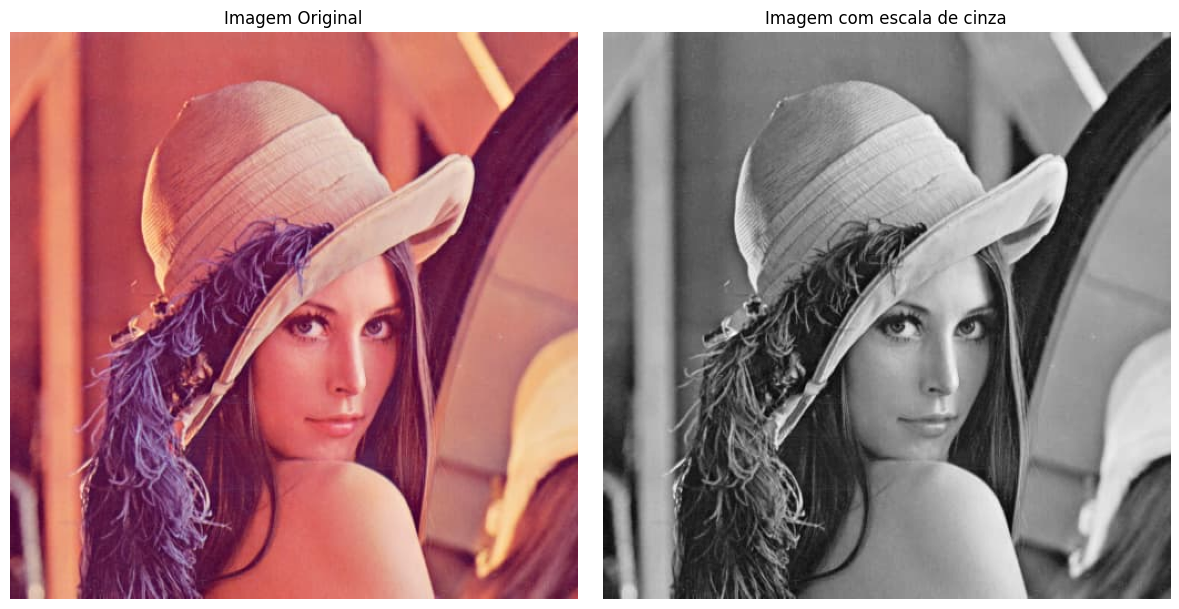

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem com escala de cinza')
plt.axis('off')

plt.tight_layout()
plt.show()

### Passo 3: Converter a imagem para um array NumPy

In [5]:
valores_pixels = np.array(imagem_cinza)

### Passo 4: Obter o array de valores 1D e normalizar de 0 a 1

In [6]:
valores_pixels_1d = valores_pixels.flatten() / 255

### Passo 5: Calcular a média e o desvio padrão dos valores dos pixels

In [7]:
media = np.mean(valores_pixels_1d)
desvio_padrao = np.std(valores_pixels_1d)

# Exibir os resultados
print("Tamanho da Imagem:", imagem_cinza.size)
print("Média:", media)
print("Desvio Padrão:", desvio_padrao)

Tamanho da Imagem: (512, 512)
Média: 0.48646373374789376
Desvio Padrão: 0.18716595137992745


### Passo 6: Construir e normalizar o vetor x com níveis de cinza de -1 até 1

In [8]:
x = np.linspace(-1, 1, 256)

# Ajustar a média e desvio padrão para o intervalo [-1, 1]
media_ajustada = (media - 0.5) * 2
desvio_padrao_ajustado = desvio_padrao * 2

x

array([-1.        , -0.99215686, -0.98431373, -0.97647059, -0.96862745,
       -0.96078431, -0.95294118, -0.94509804, -0.9372549 , -0.92941176,
       -0.92156863, -0.91372549, -0.90588235, -0.89803922, -0.89019608,
       -0.88235294, -0.8745098 , -0.86666667, -0.85882353, -0.85098039,
       -0.84313725, -0.83529412, -0.82745098, -0.81960784, -0.81176471,
       -0.80392157, -0.79607843, -0.78823529, -0.78039216, -0.77254902,
       -0.76470588, -0.75686275, -0.74901961, -0.74117647, -0.73333333,
       -0.7254902 , -0.71764706, -0.70980392, -0.70196078, -0.69411765,
       -0.68627451, -0.67843137, -0.67058824, -0.6627451 , -0.65490196,
       -0.64705882, -0.63921569, -0.63137255, -0.62352941, -0.61568627,
       -0.60784314, -0.6       , -0.59215686, -0.58431373, -0.57647059,
       -0.56862745, -0.56078431, -0.55294118, -0.54509804, -0.5372549 ,
       -0.52941176, -0.52156863, -0.51372549, -0.50588235, -0.49803922,
       -0.49019608, -0.48235294, -0.4745098 , -0.46666667, -0.45

### Função para adicionar ruídos

In [11]:
# Converter a imagem para um array NumPy
valores_pixels = np.array(imagem_cinza)

# Criar um vetor com os níveis de cinza: x = [-255, -254, ..., 254, 255]
x = np.arange(-255, 256)

In [12]:
# Normalizar o vetor x: x ← x/255
x_normalizado = x / 255.0

# Definir os limites do intervalo [a, b] para a f.d.p.
a = -1.0
b = 1.0

In [13]:
# Função para calcular a f.d.p. uniforme
def fdp_uniforme(z, a, b):
    if a <= z <= b:
        return 1 / (b - a)
    else:
        return 0

In [14]:
# Construir a f.d.p. para os pontos do vetor x
fdp = np.array([fdp_uniforme(z, a, b) for z in x_normalizado])


In [15]:
# Construir a f.d.a. a partir da f.d.p.
fda = np.cumsum(fdp)
fda = fda / fda[-1]  # Normalizar a f.d.a. para que o último valor seja 1


In [16]:
# Função para adicionar ruído uniforme a um pixel
def adicionar_ruido(pixel, fda, x_normalizado, A):
    # Gerar um número aleatório uniforme
    u = random.uniform(0, 1)
    
    # Encontrar o índice da f.d.a. mais próximo do número aleatório
    indice = np.searchsorted(fda, u)
    
    # Determinar o nível de cinza correspondente
    ruido = x_normalizado[indice] * A
    
    # Adicionar o ruído ao pixel e garantir que o valor esteja dentro do intervalo [0, 255]
    pixel_com_ruido = np.clip(pixel + ruido, 0, 255)
    
    return pixel_com_ruido

In [17]:
# Escolher a amplitude do ruído
A = 50  # Pode ajustar esse valor para controlar a intensidade do ruído


In [18]:
# Adicionar o ruído a cada pixel da imagem
valores_pixels_com_ruido = np.array([
    adicionar_ruido(pixel, fda, x_normalizado, A) for pixel in valores_pixels.flatten()
]).reshape(valores_pixels.shape)


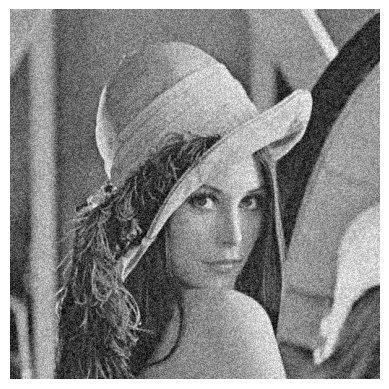

In [19]:

# Converter de volta para uma imagem
imagem_com_ruido = Image.fromarray(np.uint8(valores_pixels_com_ruido))

# Exibir a imagem com ruído
plt.imshow(imagem_com_ruido, cmap='gray')
plt.axis('off')  # Ocultar os eixos
plt.show()

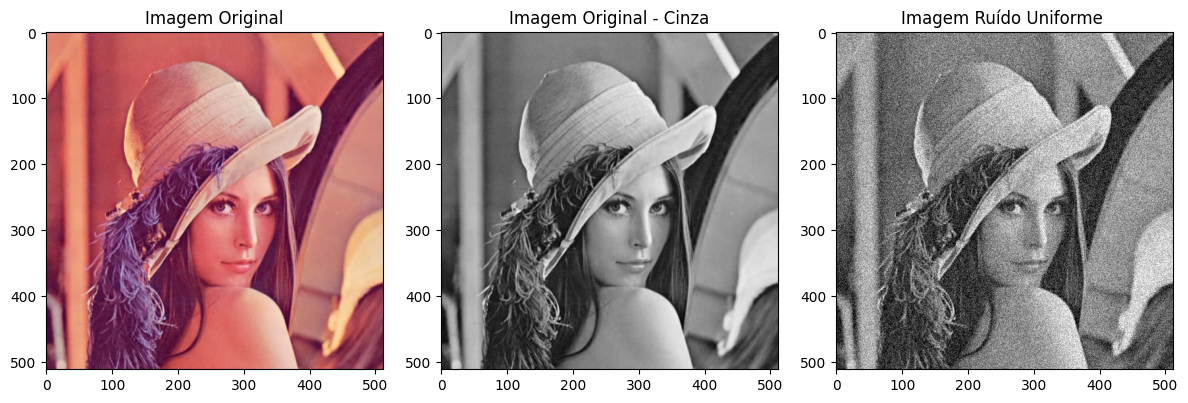

In [41]:
# Exibir a imagem original e modificada lado a lado
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagem, cmap="gray")
plt.title("Imagem Original")

plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap="gray")
plt.title("Imagem Original - Cinza")

plt.subplot(1, 3, 3)
plt.imshow(imagem_com_ruido, cmap="gray")
plt.title("Imagem Ruído Uniforme ")

plt.tight_layout()
plt.show()

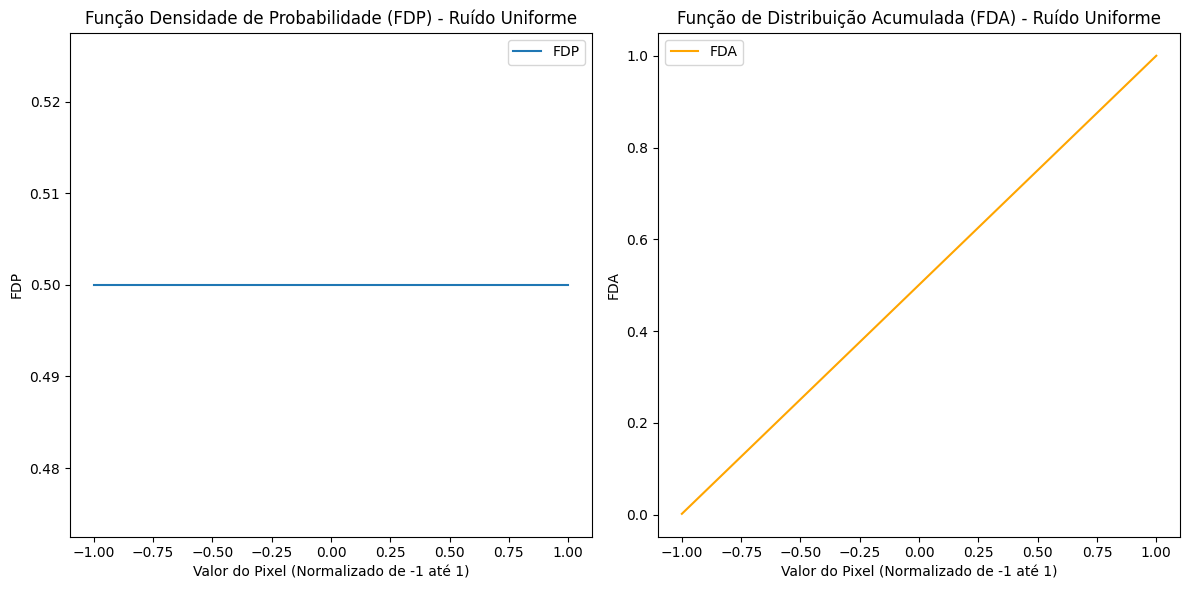

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que você já tenha o vetor x normalizado
x = np.linspace(-1, 1, 512)

# Exemplo de cálculo de valores para a FDP (pdf_values) e FDA (fda_values)
# Aqui, vamos usar uma distribuição uniforme como exemplo

# Função de Densidade de Probabilidade (FDP) uniforme
pdf_values = np.full(x.shape, 1 / (x.max() - x.min()))

# Função de Distribuição Acumulada (FDA)
fda_values = np.cumsum(pdf_values)
fda_values = fda_values / fda_values[-1]  # Normalizar para que o valor máximo seja 1

# Plotar a FDP e a FDA
plt.figure(figsize=(12, 6))

# Gráfico da FDP
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label="FDP")
plt.title("Função Densidade de Probabilidade (FDP) - Ruído Uniforme")
plt.xlabel("Valor do Pixel (Normalizado de -1 até 1)")
plt.ylabel("FDP")
plt.legend()

# Gráfico da FDA
plt.subplot(1, 2, 2)
plt.plot(x, fda_values, label="FDA", color="orange")
plt.title("Função de Distribuição Acumulada (FDA) - Ruído Uniforme")
plt.xlabel("Valor do Pixel (Normalizado de -1 até 1)")
plt.ylabel("FDA")
plt.legend()

plt.tight_layout()
plt.show()


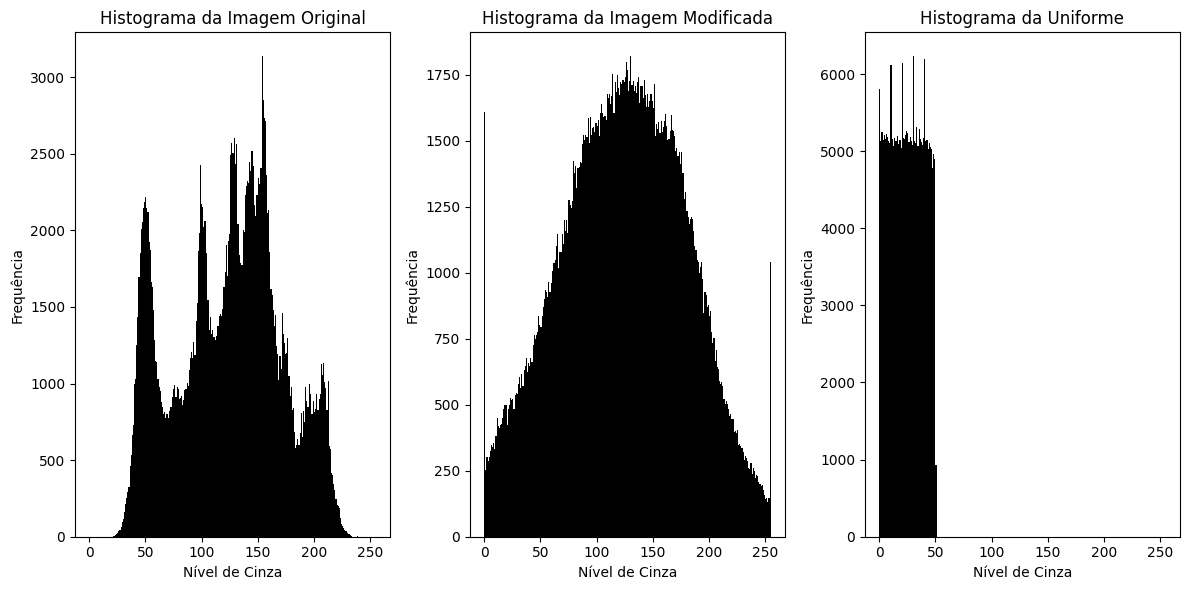

In [39]:
# Plotar os histogramas da imagem original e modificada
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(valores_pixels.flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histograma da Imagem Original")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

plt.subplot(1, 3, 2)
plt.hist(valores_pixels_com_ruido.flatten(), bins=255, range=(0, 255), color='black')
plt.title("Histograma da Imagem Modificada")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

aux = abs(valores_pixels - valores_pixels_com_ruido)

plt.subplot(1, 3, 3)
plt.hist(aux.flatten(), bins=255, range=(0, 255), color='black')
plt.title("Histograma da Uniforme")
plt.xlabel("Nível de Cinza")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()